In [33]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, auc,roc_curve
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, preprocessing

# names = [
#     "KNN",
#     "SVM",
#     "Decision Tree",
#     "Random Forest",
#     "RNA",
#     "Naive Bayes",
# ]

# classifiers = [
#     KNeighborsClassifier(5),
#     SVC(kernel="linear", C=0.025),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     GaussianNB(),
# ]

In [34]:
benign = pd.read_csv("./dataset_benign.csv")

benign.info()

malware = pd.read_csv("./dataset_malware.csv")

malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114 entries, 0 to 4113
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4114 non-null   object 
 1   e_magic                       4114 non-null   int64  
 2   e_cblp                        4114 non-null   int64  
 3   e_cp                          4114 non-null   int64  
 4   e_crlc                        4114 non-null   int64  
 5   e_cparhdr                     4114 non-null   int64  
 6   e_minalloc                    4114 non-null   int64  
 7   e_maxalloc                    4114 non-null   int64  
 8   e_ss                          4114 non-null   int64  
 9   e_sp                          4114 non-null   int64  
 10  e_csum                        4114 non-null   int64  
 11  e_ip                          4114 non-null   int64  
 12  e_cs                          4114 non-null   int64  
 13  e_l

In [35]:
data = pd.concat([benign, malware], ignore_index=True)

data = data.sample(frac=1, ignore_index=True)

data.head()


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_7a8460747893113454fa541f86313adc,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,7,74,0,0,45056,61440,0,0
1,VirusShare_575bb84340ae8b2812cdb357a83a0f2d,23117,144,3,0,4,0,65535,0,184,...,3221225600,0,8,155,0,0,29604,180224,0,0
2,VirusShare_baeed6d331ec02e8b0a796592e2b5401,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,2,23,0,0,12496,20480,0,0
3,VirusShare_7d8e5d8dbc7044a5df041e2b9bf20f0a,23117,144,3,0,4,0,65535,0,184,...,3758096416,0,7,160,0,0,217980,356352,0,0
4,VirusShare_de59dc8df6021d19246f9b74dd1d68bc,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,1,49,0,0,19652,28672,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91175 entries, 0 to 91174
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          91175 non-null  object 
 1   e_magic                       91175 non-null  int64  
 2   e_cblp                        91175 non-null  int64  
 3   e_cp                          91175 non-null  int64  
 4   e_crlc                        91175 non-null  int64  
 5   e_cparhdr                     91175 non-null  int64  
 6   e_minalloc                    91175 non-null  int64  
 7   e_maxalloc                    91175 non-null  int64  
 8   e_ss                          91175 non-null  int64  
 9   e_sp                          91175 non-null  int64  
 10  e_csum                        91175 non-null  int64  
 11  e_ip                          91175 non-null  int64  
 12  e_cs                          91175 non-null  int64  
 13  e

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

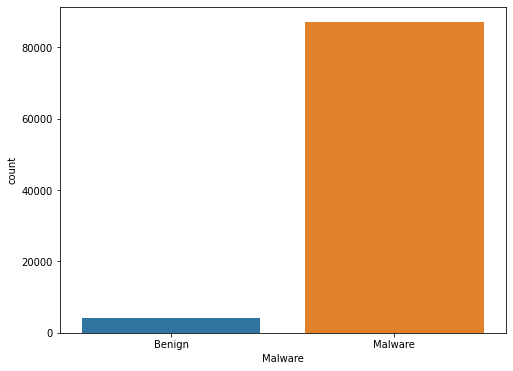

In [37]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

In [38]:
# #The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name', 'Malware'], axis = 1)
y = data['Malware']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91175 entries, 0 to 91174
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   e_magic                       91175 non-null  int64  
 1   e_cblp                        91175 non-null  int64  
 2   e_cp                          91175 non-null  int64  
 3   e_crlc                        91175 non-null  int64  
 4   e_cparhdr                     91175 non-null  int64  
 5   e_minalloc                    91175 non-null  int64  
 6   e_maxalloc                    91175 non-null  int64  
 7   e_ss                          91175 non-null  int64  
 8   e_sp                          91175 non-null  int64  
 9   e_csum                        91175 non-null  int64  
 10  e_ip                          91175 non-null  int64  
 11  e_cs                          91175 non-null  int64  
 12  e_lfarlc                      91175 non-null  int64  
 13  e

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
# X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# knn = neighbors.KNeighborsClassifier()

# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [41]:
models = []

models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

models

[('LR', LogisticRegression(max_iter=10000)),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB())]

LR: 0.999616 (0.000134)
KNN: 0.999657 (0.000206)
NB: 0.996120 (0.005657)


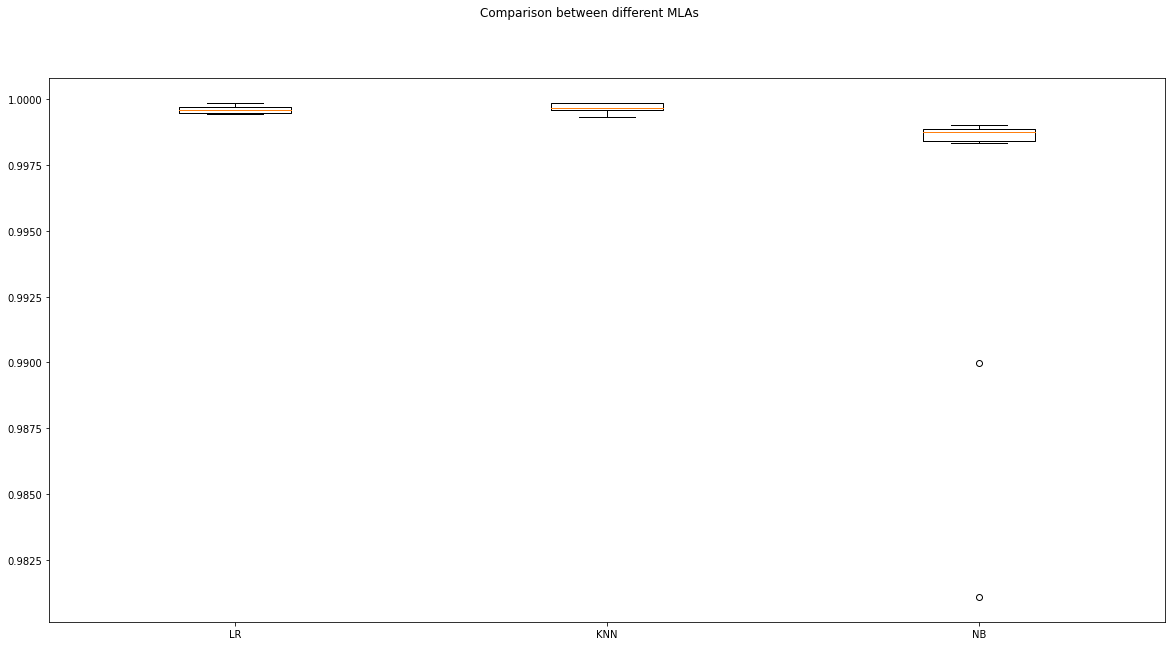

In [42]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=[20,10])
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(max_iter=10000),
    
    # #Ensemble Methods
    # ensemble.RandomForestClassifier(),
    # #SVM
    # svm.SVC(probability=True),
    # #Trees    
    # tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

Accuracy: 0.9994516040581299
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       807
     Malware       1.00      1.00      1.00     17428

    accuracy                           1.00     18235
   macro avg       1.00      1.00      1.00     18235
weighted avg       1.00      1.00      1.00     18235

Accuracy: 0.9985193309569509
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.98       807
     Malware       1.00      1.00      1.00     17428

    accuracy                           1.00     18235
   macro avg       0.99      1.00      0.99     18235
weighted avg       1.00      1.00      1.00     18235

Accuracy: 0.999561283246504
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       807
     Malware       1.00      1.00      1.00     17428

    accuracy                           1.00     18235
   macro avg       1.00      1.00      1.0

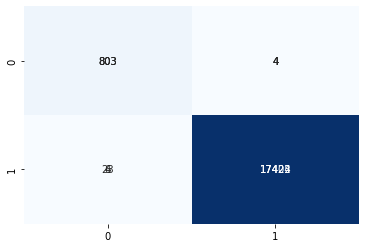

In [47]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    alg.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))

    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    
#     fp, tp, th = roc_curve(y_test, predicted)
#     MLA_name = alg.__class__.__name__
#     MLA_compare.loc[row_index,'MLA used'] = MLA_name
#     MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
#     MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
#     MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
#     MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
#     MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

#     row_index+=1
    
# MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
# MLA_compare